<a href="https://colab.research.google.com/github/leadeeerq/Projects/blob/main/NLPTechniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Natural Language Processing techniques

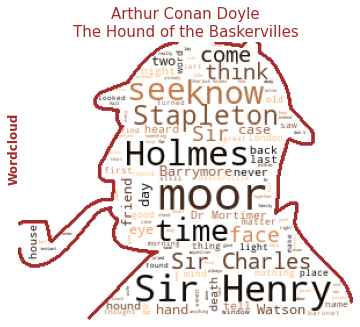

##Bag of words

In [ ]:
class Category:
  cars = 'cars'
  phones = 'phones'

train_x = ['This is a great car', 'I have a racing car', 'I used my phone', 'This is an old phone']
train_y = [Category.cars, Category.cars, Category.phones, Category.phones]

###Unigrams

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(binary=True) #przy False powtarzające się słowo w zdaniu zostanie zliczone wielokronie
train_x_vectors = vectorizer.fit_transform(train_x)

print(vectorizer.get_feature_names_out())
print(train_x_vectors.toarray())

['an' 'car' 'great' 'have' 'is' 'my' 'old' 'phone' 'racing' 'this' 'used']
[[0 1 1 0 1 0 0 0 0 1 0]
 [0 1 0 1 0 0 0 0 1 0 0]
 [0 0 0 0 0 1 0 1 0 0 1]
 [1 0 0 0 1 0 1 1 0 1 0]]


In [ ]:
from sklearn import svm

classifier = svm.SVC(kernel = 'linear') #support vector machines
classifier.fit(train_x_vectors, train_y)

SVC(kernel='linear')

In [ ]:
classifier.score(train_x_vectors, train_y)

1.0

In [ ]:
to_predict = [['My car is great'], ['Answer the phone'], ['Phone in the car']]

In [ ]:
for predict in to_predict:
  for x in predict:
    test_x = vectorizer.transform([x])
    print(classifier.predict(test_x))

['cars']
['phones']
['cars']


###Bigrams

In [ ]:
vectorizer2 = CountVectorizer(binary=True, ngram_range=(1,2))
train_x_vectors2 = vectorizer2.fit_transform(train_x)

# print(vectorizer2.get_feature_names())
print(train_x_vectors2.toarray())

[[0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0]
 [0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 1 1 0 0]]


In [ ]:
classifier2 = svm.SVC(kernel = 'linear') #support vector machines
classifier2.fit(train_x_vectors2, train_y)

SVC(kernel='linear')

In [ ]:
to_predict = [['My car is great'], ['Answer the phone'], ['Old phone in the car'], ['Phone in the racing car']]

In [ ]:
for predict in to_predict:
  for x in predict:
    test_x = vectorizer2.transform([x])
    print(classifier2.predict(test_x))

['cars']
['phones']
['phones']
['cars']


##Word Vectors (spacy library)

In [ ]:
# !pip install spacy
# !python -m spacy download en_core_web_md

In [ ]:
import spacy

nlp = spacy.load('en_core_web_md')

In [ ]:
print(train_x)

['This is a great car', 'I have a racing car', 'I used my phone', 'This is an old phone']


In [ ]:
docs = [nlp(text) for text in train_x]
print(docs[0].vector[0:10])

[-0.275218    3.2722201  -4.1159062  -2.44268     4.472822   -1.7578399
  2.76648     3.67203     1.2675419   0.97931397]


In [ ]:
train_x_word_vectors = [x.vector for x in docs]

In [ ]:
classifier_wm = svm.SVC(kernel = 'linear') #support vector machines
classifier_wm.fit(train_x_word_vectors, train_y)

SVC(kernel='linear')

In [ ]:
to_predict = [['My car is great'], ['Answer the phone'], ['Old lady in the automobile'], ['I love this mobile']] #Car -> automobile, phone -> mobile

In [ ]:
for predict in to_predict:
  print(predict)
  predict_docs = [nlp(word) for word in predict]
  test_x_word_vectors = [x.vector for x in predict_docs]
  print(classifier_wm.predict(test_x_word_vectors))

['My car is great']
['cars']
['Answer the phone']
['phones']
['Old lady in the automobile']
['cars']
['I love this mobile']
['phones']


##Regular expressions, regex

In [ ]:
import re

reexp = re.compile(r'ab\S*cd')
phrases = ['abcd', 'abac', 'ab cd', 'aa abcd']
matches = []
for phrase in phrases:
  if re.match(reexp, phrase): #reexp == phrase
    matches.append(phrase)

print(matches)

['abcd']


In [ ]:
matches = []
for phrase in phrases:
  if re.search(reexp, phrase): #Wyszukiwanie frazy wewnątrz stringa
    matches.append(phrase)

print(matches)

['abcd', 'aa abcd']


##Stemming/Lemmatization

In [ ]:
import nltk

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

###Stemming

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

phrase = 'driving the sports car'
words = word_tokenize(phrase)
stemmed_words = []

for word in words:
  stemmed_words.append(stemmer.stem(word))

print(" ".join(stemmed_words))

drive the sport car


###Lemmatization

In [ ]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

phrase = 'Lemmatization processes grouping forms words a single item'
words = word_tokenize(phrase)
lemmatized_words = []

for word in words:
  lemmatized_words.append(lemmatizer.lemmatize(word))

print(" ".join(lemmatized_words))

Lemmatization process grouping form word a single item


In [ ]:
lemmatizer.lemmatize('better', pos = 'a')

'good'

In [ ]:
lemmatizer.lemmatize('driving', pos = 'v')

'drive'

##Stopwords removal

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
print(len(stop_words))

<class 'list'>


In [ ]:
phrase = 'This is a sentence example to demonstrate the stopwords removal'
words = word_tokenize(phrase)
stripped_phrase = []
for word in words:
  if word not in stop_words:
    stripped_phrase.append(word)

print(" ".join(stripped_phrase))

This sentence example demonstrate stopwords removal


#Project - wordcloud

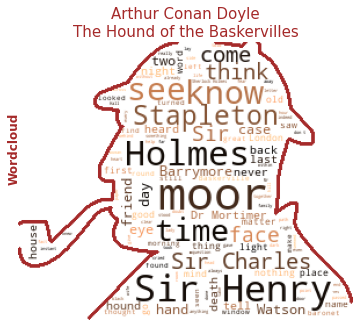

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

with open('/content/drive/MyDrive/Projekty/NLP/hound.txt') as infile: #Otwarcie pliku z tekstem książki Pies Baskerville’ów
    text = infile.read()

mask = np.array(Image.open('/content/drive/MyDrive/Projekty/NLP/holmes.png')) #Wgranie obrazu jako np array

stop_words = STOPWORDS #Usunięcie nieistotnych słów
stop_words.update(['upon', 's', 'us', 'one', 'will', 'said', 'now', 'well', 'man', 'may',
                  'little', 'say', 'must', 'way', 'long', 'yet', 'mean',
                  'put', 'seem', 'asked', 'made', 'half', 'much',
                  'certainly', 'might', 'came'])

wc = WordCloud(max_words=500, #Wygenerowanie chmury słów
               relative_scaling=0.5,
               mask=mask,
               background_color='white',
               stopwords=stop_words,
               margin=2,
               random_state=7,
               contour_width=2,
               contour_color='brown',
               colormap='copper').generate(text)

colors = wc.to_array() #Przekształcenie obiektu wc na tablicę

plt.figure(figsize=(6,6))
plt.title("Arthur Conan Doyle\nThe Hound of the Baskervilles", fontsize=15, color='brown')
plt.text(-10, 120, "Wordcloud", fontsize=12, fontweight='bold', color='brown', rotation=90)
plt.imshow(colors)
plt.axis('off')
plt.show()
##plt.savefig('hound_wordcloud.png')

#Other techniques

##Spell correction (TextBlob)

In [11]:
from textblob import TextBlob
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [16]:
phrase = 'It is a setnence example tor demonstrate the textblob libbrary.'

tb_phrase = TextBlob(phrase)
tb_phrase.correct()

TextBlob("It is a sentence example to demonstrate the textbook library.")

In [17]:
phrase = 'It is a sentence example to demonstrate the textblob library.'
tb_phrase = TextBlob(phrase)
tb_phrase.tags

[('It', 'PRP'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('sentence', 'NN'),
 ('example', 'NN'),
 ('to', 'TO'),
 ('demonstrate', 'VB'),
 ('the', 'DT'),
 ('textblob', 'NN'),
 ('library', 'NN')]

In [ ]:
# 1.	CC	Coordinating conjunction
# 2.	CD	Cardinal number
# 3.	DT	Determiner
# 4.	EX	Existential there
# 5.	FW	Foreign word
# 6.	IN	Preposition or subordinating conjunction
# 7.	JJ	Adjective
# 8.	JJR	Adjective, comparative
# 9.	JJS	Adjective, superlative
# 10.	LS	List item marker
# 11.	MD	Modal
# 12.	NN	Noun, singular or mass
# 13.	NNS	Noun, plural
# 14.	NNP	Proper noun, singular
# 15.	NNPS	Proper noun, plural
# 16.	PDT	Predeterminer
# 17.	POS	Possessive ending
# 18.	PRP	Personal pronoun
# 19.	PRP$	Possessive pronoun
# 20.	RB	Adverb
# 21.	RBR	Adverb, comparative
# 22.	RBS	Adverb, superlative
# 23.	RP	Particle
# 24.	SYM	Symbol
# 25.	TO	to
# 26.	UH	Interjection
# 27.	VB	Verb, base form
# 28.	VBD	Verb, past tense
# 29.	VBG	Verb, gerund or present participle
# 30.	VBN	Verb, past participle
# 31.	VBP	Verb, non-3rd person singular present
# 32.	VBZ	Verb, 3rd person singular present
# 33.	WDT	Wh-determiner
# 34.	WP	Wh-pronoun
# 35.	WP$	Possessive wh-pronoun

In [19]:
phrase = 'It is a long sentence example to demonstrate the great textblob library.'
tb_phrase = TextBlob(phrase)
tb_phrase.sentiment

Sentiment(polarity=0.375, subjectivity=0.575)

##Google translate

In [ ]:
!pip install googletrans==4.0.0-rc1

In [22]:
zdanie = 'To zdanie zostało napisane w języku polskim.'

translator = Translator()
print(translator.detect(zdanie))

Detected(lang=pl, confidence=None)


In [21]:
satz = 'Dieser Satz wurde auf Deutsch geschrieben.'
print(translator.translate(satz, dest='pl').text)

To zdanie zostało napisane po niemiecku.
